# Manufactured solution for antiplane shear problem

The following manufactured solution is almost identictial to the one presented in

Erickson, B. A., and E. M. Dunham (2014), An efficient numerical method for earthquake cycles in heterogeneous media: Alternating subbasin and surface-rupturing events on faults crossing a sedimentary basin, J. Geophys. Res. Solid Earth, 119, 3290–3316, doi:10.1002/2013JB010614.

The only difference is that the shear modulus is constant.

Note that the manufactured solution is going to exactly solve the following problem:

$$
\begin{aligned}
    -\frac{\partial}{\partial x_i}\left(\mu\frac{\partial u}{\partial x_i}\right) &= 0 & \text{ in } & \Omega\\
    u &= u^* & \text{ on } & \Gamma_D \\
    u &= S / 2 & \text{ on } & \Gamma_F \\
    \mu\frac{\partial u}{\partial x_i}n_i &= \sigma_nf(V,\psi) + \eta V & \text{ on } & \Gamma_F \\
    \frac{d\psi}{dt} &= g(V,\psi) + s(\vec x, t) & \text{ on } & \Gamma_F \\ 
    \frac{dS}{dt} &= V & \text{ on } & \Gamma_F
\end{aligned},
$$
where
$$
\begin{aligned}
    f(V, \psi) &= a \cdot \mathrm{asinh}\left(\frac{V}{2.0 V_0} \exp\left(\frac{\psi}{a}\right)\right) \\
    g(V, \psi) &= \frac{b V_0}{L} \left(\exp\left(\frac{f_0-\psi}{b}\right) - \frac{V}{V_0}\right) \\
    s(\vec{x}, t) &= - g(V^*, \psi^*) + \frac{d\psi^*}{dt}
\end{aligned}
$$

In [1]:
from sympy import *
init_printing()

We first define symbols and general functions, which are going to be specified later.

In [2]:
x, y, t = symbols('x y t')
H, L_x, t_e, t_w = symbols('H L_x t_e t_w')
V0, V_p, V_min = symbols('V0 V_p V_min')
delta, tau_inf, a, sn, eta = symbols('delta tau_inf a sn eta')
K = Function('K')(t)
phi = Function('phi')(x, y)
V_star = Function('V^*')(t)
tau_star = Function('tau^*')(t)
mu = symbols('mu')

$u^*$ is solution for the out-of-plane displacement.

In [3]:
u_star = delta / 2 * K * phi + V_p / 2 * t * (1 - phi) + tau_inf / mu.subs(x, L_x) * x 
u_star

The following force term needs to be added to the right-hand-side of the Poisson problem. Due to the choice of $\phi$ and the constant shear modulus it is going to be zero.

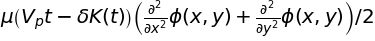

In [4]:
force = - (mu * u_star.diff(x)).diff(x) - (mu * u_star.diff(y)).diff(y)
force.simplify()

$S^*$ is the on-fault displacement.

In [5]:
S_star = 2 * u_star.subs(x, 0)
S_star.simplify().subs(t, 0)

$\psi^*$ is the state variable.

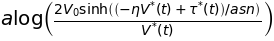

In [6]:
psi_star = a * log((2*V0/V_star) * sinh((tau_star - eta*V_star)/(a*sn)))
psi_star

We need the time derivative $\frac{d\psi^*}{dt}$

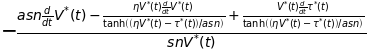

In [7]:
psi_star.diff(t).simplify()

$\tau^*$ is the on fault traction.

In [8]:
tau_star = mu * u_star.diff(x).subs(x, 0)
tau_star.simplify()

                   ⎛∂          ⎞│           
μ⋅(-Vₚ⋅t + δ⋅K(t))⋅⎜──(φ(x, y))⎟│           
                   ⎝∂x         ⎠│x=0        
──────────────────────────────────── + τ_inf
                 2                          

Time derivative of traction: $\frac{d \tau^*}{dt}$

In [9]:
tau_star.diff(t).simplify()

  ⎛        d       ⎞ ⎛∂          ⎞│   
μ⋅⎜-Vₚ + δ⋅──(K(t))⎟⋅⎜──(φ(x, y))⎟│   
  ⎝        dt      ⎠ ⎝∂x         ⎠│x=0
──────────────────────────────────────
                  2                   

Slip-rate $V^*$

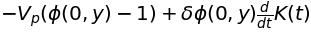

In [10]:
V_star = S_star.diff(t)
V_star.simplify()

Acceleration $\frac{dV^*}{dt}$

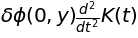

In [11]:
V_star.diff(t).simplify()

The following lines define the functions $K$, $\phi$, and necessary time derivatives.

In [12]:
K = 1/pi * (atan((t-t_e)/t_w) + pi/2) + V_min / delta * t
K

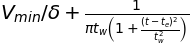

In [13]:
K.diff(t)

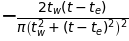

In [14]:
K.diff(t).diff(t).simplify()

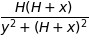

In [15]:
phi = H*(H+x) / ((H+x)**2 + y**2)
phi

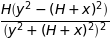

In [16]:
phi.diff(x).simplify()

We show that $\mathop{}\!\mathbin\bigtriangleup \phi = 0$, therefore no additional force term for the Poisson equation is required.

In [17]:
(phi.diff(x).diff(x) + phi.diff(y).diff(y)).simplify()